Problem statement #####
____________________________________________________________________________________________
•	Build word frequency analysis on National day speech data discussed in the session 1

•	Build a wordcloud for the National day speech data

•	Compare the results from different tools (Word cloud, Frequency table, Frequency bar chart)

•	Repeat the process for a web page of your choice
_______________________________________________________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans


In [3]:
from wordcloud import WordCloud

In [7]:
df=pd.read_csv("C:\Sishil\MBA\Sishil Assignments\Text Analytics\Assignment\Modi2019.csv")

In [8]:
df.head()

,Speech
0,"My dear countrymen,"
1,"On this solemn day of Independence, many greet..."
2,Today is also the festival of Raksha Bandhan. ...
3,"Today, while the country is celebrating the fe..."
4,"Today, when we are celebrating this auspicious..."


In [11]:
from nltk.tokenize import sent_tokenize

In [60]:
text_file=open("C:\\Sishil\\MBA\\Sishil Assignments\\Text Analytics\\Assignment\\modi2019speech.txt")

In [61]:
text=text_file.read()

In [16]:
print(text)

My dear countrymen,

On this holy day of Independence, many wishes to all countrymen.

Today is also the festival of Raksha-Bandhan. This centuries-old tradition expresses the love of brotherly sisterhood. I extend my best wishes to all the countrymen and all the brothers and sisters on this holy festival of Raksha Bandhan. This festival of affection should be fulfilling the hopes and aspirations in the lives of all our brothers and sisters, fulfilling dreams and enhancing affection.

Today, when the country is celebrating the festival of independence, at the same time due to excessive rains in many parts of the country, people are facing difficulties due to floods. Many have lost their lives. I express my condolences to them and the State Government, Central Government, NDRF, all organizations are working day and night to reduce the distress of the citizens, how to return to normalcy quickly.

Today, when we are celebrating this holy day of independence, for the freedom of the country

In [17]:
print(type(text))

<class 'str'>


In [18]:
print(len(text))

53228


In [19]:
from nltk import sent_tokenize
from nltk import word_tokenize

In [20]:
#tokenize the text by sentences
sentences=sent_tokenize(text)

In [21]:
sentences

['My dear countrymen,\n\nOn this holy day of Independence, many wishes to all countrymen.',
 'Today is also the festival of Raksha-Bandhan.',
 'This centuries-old tradition expresses the love of brotherly sisterhood.',
 'I extend my best wishes to all the countrymen and all the brothers and sisters on this holy festival of Raksha Bandhan.',
 'This festival of affection should be fulfilling the hopes and aspirations in the lives of all our brothers and sisters, fulfilling dreams and enhancing affection.',
 'Today, when the country is celebrating the festival of independence, at the same time due to excessive rains in many parts of the country, people are facing difficulties due to floods.',
 'Many have lost their lives.',
 'I express my condolences to them and the State Government, Central Government, NDRF, all organizations are working day and night to reduce the distress of the citizens, how to return to normalcy quickly.',
 'Today, when we are celebrating this holy day of independenc

In [22]:
print(len(sentences))

475


In [23]:
words=word_tokenize(text)
print(words)


['My', 'dear', 'countrymen', ',', 'On', 'this', 'holy', 'day', 'of', 'Independence', ',', 'many', 'wishes', 'to', 'all', 'countrymen', '.', 'Today', 'is', 'also', 'the', 'festival', 'of', 'Raksha-Bandhan', '.', 'This', 'centuries-old', 'tradition', 'expresses', 'the', 'love', 'of', 'brotherly', 'sisterhood', '.', 'I', 'extend', 'my', 'best', 'wishes', 'to', 'all', 'the', 'countrymen', 'and', 'all', 'the', 'brothers', 'and', 'sisters', 'on', 'this', 'holy', 'festival', 'of', 'Raksha', 'Bandhan', '.', 'This', 'festival', 'of', 'affection', 'should', 'be', 'fulfilling', 'the', 'hopes', 'and', 'aspirations', 'in', 'the', 'lives', 'of', 'all', 'our', 'brothers', 'and', 'sisters', ',', 'fulfilling', 'dreams', 'and', 'enhancing', 'affection', '.', 'Today', ',', 'when', 'the', 'country', 'is', 'celebrating', 'the', 'festival', 'of', 'independence', ',', 'at', 'the', 'same', 'time', 'due', 'to', 'excessive', 'rains', 'in', 'many', 'parts', 'of', 'the', 'country', ',', 'people', 'are', 'facing',

In [24]:
print(len(words))

10677


In [25]:
from nltk.probability import FreqDist

In [26]:
#find the frequency of the words
fdist=FreqDist(words)

In [28]:
print(fdist)
fdist

<FreqDist with 1795 samples and 10677 outcomes>


FreqDist({',': 742, 'the': 566, '.': 440, 'of': 321, 'to': 309, 'in': 182, 'and': 166, 'is': 163, 'a': 157, 'have': 153, ...})

In [30]:
fdist.most_common(10)

[(',', 742),
 ('the', 566),
 ('.', 440),
 ('of', 321),
 ('to', 309),
 ('in', 182),
 ('and', 166),
 ('is', 163),
 ('a', 157),
 ('have', 153)]

In [31]:
import matplotlib.pyplot as plt

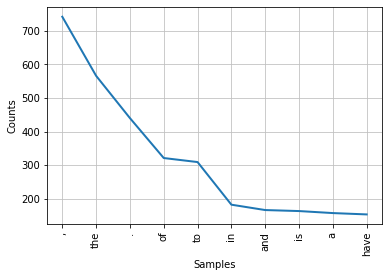

In [32]:
fdist.plot(10)

In [33]:
from nltk.corpus import stopwords

In [34]:
stopwords=stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
words_no_punc=[]

for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())
        
#print the words with punctuation marks
print(words_no_punc)

['my', 'dear', 'countrymen', 'on', 'this', 'holy', 'day', 'of', 'independence', 'many', 'wishes', 'to', 'all', 'countrymen', 'today', 'is', 'also', 'the', 'festival', 'of', 'this', 'tradition', 'expresses', 'the', 'love', 'of', 'brotherly', 'sisterhood', 'i', 'extend', 'my', 'best', 'wishes', 'to', 'all', 'the', 'countrymen', 'and', 'all', 'the', 'brothers', 'and', 'sisters', 'on', 'this', 'holy', 'festival', 'of', 'raksha', 'bandhan', 'this', 'festival', 'of', 'affection', 'should', 'be', 'fulfilling', 'the', 'hopes', 'and', 'aspirations', 'in', 'the', 'lives', 'of', 'all', 'our', 'brothers', 'and', 'sisters', 'fulfilling', 'dreams', 'and', 'enhancing', 'affection', 'today', 'when', 'the', 'country', 'is', 'celebrating', 'the', 'festival', 'of', 'independence', 'at', 'the', 'same', 'time', 'due', 'to', 'excessive', 'rains', 'in', 'many', 'parts', 'of', 'the', 'country', 'people', 'are', 'facing', 'difficulties', 'due', 'to', 'floods', 'many', 'have', 'lost', 'their', 'lives', 'i', 'ex

In [38]:
#length
print(len(words))
#length after removing the punctuation
print(len(words_no_punc))


10677
9238


In [39]:
#removing stop words
clean_words=[]

for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)
print(clean_words)


['dear', 'countrymen', 'holy', 'day', 'independence', 'many', 'wishes', 'countrymen', 'today', 'also', 'festival', 'tradition', 'expresses', 'love', 'brotherly', 'sisterhood', 'extend', 'best', 'wishes', 'countrymen', 'brothers', 'sisters', 'holy', 'festival', 'raksha', 'bandhan', 'festival', 'affection', 'fulfilling', 'hopes', 'aspirations', 'lives', 'brothers', 'sisters', 'fulfilling', 'dreams', 'enhancing', 'affection', 'today', 'country', 'celebrating', 'festival', 'independence', 'time', 'due', 'excessive', 'rains', 'many', 'parts', 'country', 'people', 'facing', 'difficulties', 'due', 'floods', 'many', 'lost', 'lives', 'express', 'condolences', 'state', 'government', 'central', 'government', 'ndrf', 'organizations', 'working', 'day', 'night', 'reduce', 'distress', 'citizens', 'return', 'normalcy', 'quickly', 'today', 'celebrating', 'holy', 'day', 'independence', 'freedom', 'country', 'gave', 'lives', 'gave', 'youth', 'cut', 'youth', 'prisons', 'kissed', 'hanging', 'noose', 'satya

In [40]:
print(len(clean_words))

4491


In [42]:
fdist_clean=FreqDist(clean_words)


In [43]:
fdist_clean.most_common(10)

[('country', 120),
 ('also', 65),
 ('india', 49),
 ('today', 48),
 ('years', 45),
 ('us', 40),
 ('world', 40),
 ('people', 39),
 ('countrymen', 35),
 ('new', 33)]

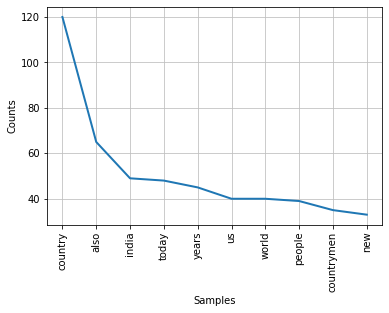

In [44]:
fdist_clean.plot(10)

In [45]:
from wordcloud import WordCloud

In [47]:
wordcloud=WordCloud().generate(text)

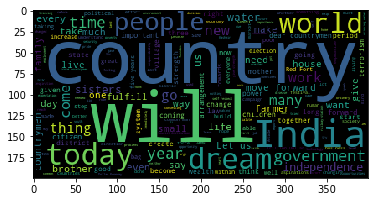

In [48]:
plt.imshow(wordcloud)

In [49]:
print(type(clean_words))

<class 'list'>


In [56]:
liststr=' '.join(map(str,clean_words))

In [57]:
liststr

'dear countrymen holy day independence many wishes countrymen today also festival tradition expresses love brotherly sisterhood extend best wishes countrymen brothers sisters holy festival raksha bandhan festival affection fulfilling hopes aspirations lives brothers sisters fulfilling dreams enhancing affection today country celebrating festival independence time due excessive rains many parts country people facing difficulties due floods many lost lives express condolences state government central government ndrf organizations working day night reduce distress citizens return normalcy quickly today celebrating holy day independence freedom country gave lives gave youth cut youth prisons kissed hanging noose satyagraha filled voice bugle independence country attained independence leadership pujya bapu pay respectful salute sacrificed india today way independence country lakshwadhi people contributed many years peace country security prosperity today salute people contributed fulfill ho

In [58]:
wordcloud=WordCloud().generate(liststr)

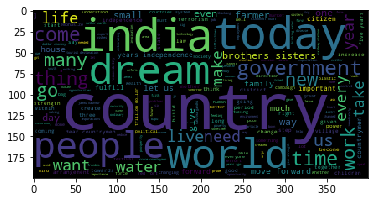

In [59]:
plt.imshow(wordcloud)

In [62]:
from urllib.request import urlopen
response = urlopen('https://en.wikipedia.org/wiki/Languages_of_India')
html = response.read()
print(len(html))
#tokens_bangalore = [tok for tok in html.split()]
#print("Total no of tokens :"+ str(len(tokens_py)))
#print(tokens_py[0:100])



417009


In [63]:
#import libraries
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#from contractions import CONTRACTION_MAP
import unicodedata
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

In [64]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
for script in soup(["script", "style"]):
    script.extract() 
print(soup.get_text())







Languages of India - Wikipedia





























Languages of India

From Wikipedia, the free encyclopedia



Jump to navigation
Jump to search


languages spoken in the Republic of India


Languages of India
Language families of the Indian subcontinent
Nihali, Kusunda and Thai languages are not shown.
OfficialAssameseBengaliBodoDogriEnglish[1][2][3]GujaratiHindi[1][4]KannadaKashmiriKonkaniMaithiliMalayalamMarathiMeiteiNepaliOdiaPunjabiSanskritSantaliSindhiTamilTeluguUrdu(total: 23, including 22 8th Schedule languages and additional  official language, English)ForeignEnglish – 200 million (L2 speakers 2003)[5]Signed
Indo-Pakistani Sign Language
Alipur Sign Language
Naga Sign Language (extinct)

Part of a series on theCulture of India
History
People
Languages
Assamese
Bengali
Bodo
Dogri
Gujarati
Hindi
Kannada
Kashmiri
Konkani
Maithili
Malayalam
Manipuri
Marathi
Nepali
Odia
Punjabi
Sanskrit
Santali
Sindhi
Tamil
Telugu
Urdu

Mythology and folklore
Mythology
folklore
Indian 

In [65]:
import re
def remove_special_characters(text, remove_digits=False):
    pattern = r'[[]{} -()^a-zA-z0-9\'\s]' if not remove_digits else r'[[]{}-() ^a-zA-z\'\s0-9]'
    text = re.sub(pattern, '', text)
    return text

In [67]:
#Get the token
tokens_kannada = [tok for tok in soup.get_text().split()]
tokens_kannada_clean = []
for token in tokens_kannada:
    if token in stopwords:
        pass
    else:
        tokens_kannada_clean.append(token.replace('.', '').strip())
print(tokens_kannada_clean) 



['Languages', 'India', '-', 'Wikipedia', 'Languages', 'India', 'From', 'Wikipedia,', 'free', 'encyclopedia', 'Jump', 'navigation', 'Jump', 'search', 'languages', 'spoken', 'Republic', 'India', 'Languages', 'India', 'Language', 'families', 'Indian', 'subcontinent', 'Nihali,', 'Kusunda', 'Thai', 'languages', 'shown', 'OfficialAssameseBengaliBodoDogriEnglish[1][2][3]GujaratiHindi[1][4]KannadaKashmiriKonkaniMaithiliMalayalamMarathiMeiteiNepaliOdiaPunjabiSanskritSantaliSindhiTamilTeluguUrdu(total:', '23,', 'including', '22', '8th', 'Schedule', 'languages', 'additional', 'official', 'language,', 'English)ForeignEnglish', '–', '200', 'million', '(L2', 'speakers', '2003)[5]Signed', 'Indo-Pakistani', 'Sign', 'Language', 'Alipur', 'Sign', 'Language', 'Naga', 'Sign', 'Language', '(extinct)', 'Part', 'series', 'theCulture', 'India', 'History', 'People', 'Languages', 'Assamese', 'Bengali', 'Bodo', 'Dogri', 'Gujarati', 'Hindi', 'Kannada', 'Kashmiri', 'Konkani', 'Maithili', 'Malayalam', 'Manipuri', '

In [69]:
def wordfreq(words):
    word_freq={}
    for tok in words:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
        #print(word_freq)
    return word_freq

def sort_tokens(tokens):
    import operator
    sorted_d = sorted(tokens.items(), key=operator.itemgetter(1),reverse=True)
    #print('Dictionary in descending order by value : ',sorted_d)
    #print(sorted_d[:25])
    return(sorted_d)



In [70]:
new_tokens = wordfreq(tokens_kannada_clean)

In [71]:
data = sort_tokens(wordfreq(tokens_kannada_clean))

In [72]:
word_frequency = pd.DataFrame(data, columns = ['word', 'frequency'])

In [73]:
word_frequency.head()

,word,frequency
0,language,223
1,languages,182
2,^,160
3,india,154
4,the,106


In [81]:
#print(tokens_kannada_clean[0:100])
type(tokens_kannada_clean)
string_kannada=' '.join(map(str,tokens_kannada_clean))

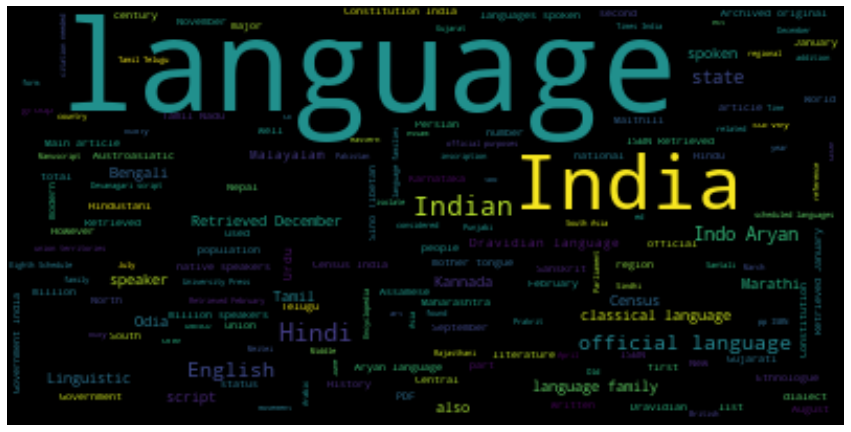

In [82]:
wordcloud_kannada = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(string_kannada)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_kannada, interpolation='bilinear')
plt.axis("off")
plt.show()



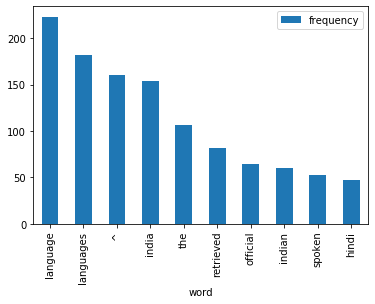

In [83]:
word_frequency[0:10].plot.bar('word','frequency')

In [84]:
#Stemming
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [85]:
for w in tokens_kannada_clean:
    print(porter.stem(w))

languag
india
-
wikipedia
languag
india
from
wikipedia,
free
encyclopedia
jump
navig
jump
search
languag
spoken
republ
india
languag
india
languag
famili
indian
subcontin
nihali,
kusunda
thai
languag
shown
officialassamesebengalibododogrienglish[1][2][3]gujaratihindi[1][4]kannadakashmirikonkanimaithilimalayalammarathimeiteinepaliodiapunjabisanskritsantalisindhitamilteluguurdu(total:
23,
includ
22
8th
schedul
languag
addit
offici
language,
english)foreignenglish
–
200
million
(l2
speaker
2003)[5]sign
indo-pakistani
sign
languag
alipur
sign
languag
naga
sign
languag
(extinct)
part
seri
thecultur
india
histori
peopl
languag
assames
bengali
bodo
dogri
gujarati
hindi
kannada
kashmiri
konkani
maithili
malayalam
manipuri
marathi
nepali
odia
punjabi
sanskrit
santali
sindhi
tamil
telugu
urdu
mytholog
folklor
mytholog
folklor
indian
epic
poetri
vedic
mytholog
buddhist
mytholog
cuisin
religion
art
architectur
sculptur
paint
literatur
indian
poetri
music
perform
art
music
perform
art
theatr
media
